In [1]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd

In [2]:
# Mount drive - needed for GBQ creds
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
root_path = '/content/drive/MyDrive/GitHub'

In [4]:
credentials = service_account.Credentials.from_service_account_file(
    f'{root_path}/grav-waves/grav-waves-358320-34ebfeae2689.json', scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

client = bigquery.Client(credentials=credentials, project=credentials.project_id,)

In [5]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [6]:
!pip install rpy2==3.5.1 # problems with newer versions, still not fixed: https://stackoverflow.com/questions/74283327/conversion-py2rpy-not-defined-for-objects-of-type-class-str
%load_ext rpy2.ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp39-cp39-linux_x86_64.whl size=317902 sha256=8d6c3ecd1e2f3a11d9d8d821efc752880511a72a3093cea90ca6e58f361d9921
  Stored in directory: /root/.cache/pip/wheels/09/e7/bc/33685b60ab54dba969596dd87244ee9f4c2e83dff9a53d4f20
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [ ]:
%%R
# Packages
install.packages("sysfonts")
install.packages("extrafont")
install.packages("showtext")
install.packages("bigrquery")
library(sysfonts)
library(extrafont)
library(showtext)
library(bigrquery)
library(tidyverse)
library(glue)

# Fonts
font_add_google("Didact Gothic", "dg")
font_add_google("IBM Plex Sans", "ibm")

showtext_auto()
font_fam = "ibm"

# Aesthetics
purple_light <- "#d8d5f7"
purple <- "#9992DA" 
purple_dark <- "#706BA4"
grey_dark <- "#585959"

theme_light_beige <- theme(plot.background = element_rect(fill = "#F0F1EA", color = "transparent"),
      panel.background = element_rect(fill = "#F0F1EA", color = "transparent"),
      plot.margin = margin(t = "1.5", r = "1.5", b = "1.5", l = "1.5", unit = "in"),
      plot.caption = element_text(size = 12, color = "#343A41", family = font_fam),
      panel.grid = element_blank(),
      plot.title = element_text(size = 40, color = "#343A41", family = font_fam, face = "bold"),
      axis.text = element_text(size = 15, color = "#343A41", family = font_fam),
      axis.title = element_text(size = 19, color = "#343A41", family = font_fam),
      axis.ticks = element_blank(),
      legend.background = element_blank(),
      legend.position = "bottom",
      legend.title = element_text(color = "#343A41", family = font_fam),
      legend.text = element_text(color = "#343A41", family = font_fam),
      strip.background = element_rect(fill = "#343A41"),
      strip.text = element_text(color = "white", family = font_fam, face = "bold", size = 13))


theme_tech <- theme(panel.background = element_rect(fill = purple_light, color = purple_light),
        panel.grid = element_line(color = purple_light),
        strip.background = element_rect(fill = purple_dark),
        strip.text = element_text(color = "white", size = 15, face = "bold"),
        axis.ticks = element_blank(),
        axis.title = element_text(face = "bold", size = 19, color = grey_dark),
        axis.text.y = element_text(size = 15, color = grey_dark),
        # axis.text.y = element_blank(),
        axis.text.x = element_text(size = 15, color = grey_dark, face = 'bold'),
        plot.title = element_text(size = 40, color = "#343A41", family = font_fam, face = "bold"))

# 1. Pull a NS-NS merger

In [ ]:
%%R
# Specific merger involving 2 neutron stars
gw_event <- bq_table_download(bq_project_query("grav-waves-358320",
"select b.*
from `mergers.features` a
left join `mergers.timeseries` b
on a.id = b.id
where a.commonName = 'GW170817';"))

In [ ]:
%%R

gw_event %>% head()

# A tibble: 6 × 4
  id          observatory     size capture_dttm       
  <chr>       <chr>          <dbl> <dttm>             
1 GW170817-v3 L1          2.87e-20 2017-08-17 12:40:49
2 GW170817-v3 L1          2.77e-20 2017-08-17 12:40:49
3 GW170817-v3 L1          2.64e-20 2017-08-17 12:40:49
4 GW170817-v3 L1          1.65e-20 2017-08-17 12:40:49
5 GW170817-v3 L1          1.66e-20 2017-08-17 12:40:49
6 GW170817-v3 L1          1.37e-20 2017-08-17 12:40:49


In [ ]:
%%R
min(gw_event$capture_dttm)

[1] "2017-08-17 12:40:49 UTC"


In [ ]:
%%R 
max(gw_event$capture_dttm)

[1] "2017-08-17 12:41:19 UTC"


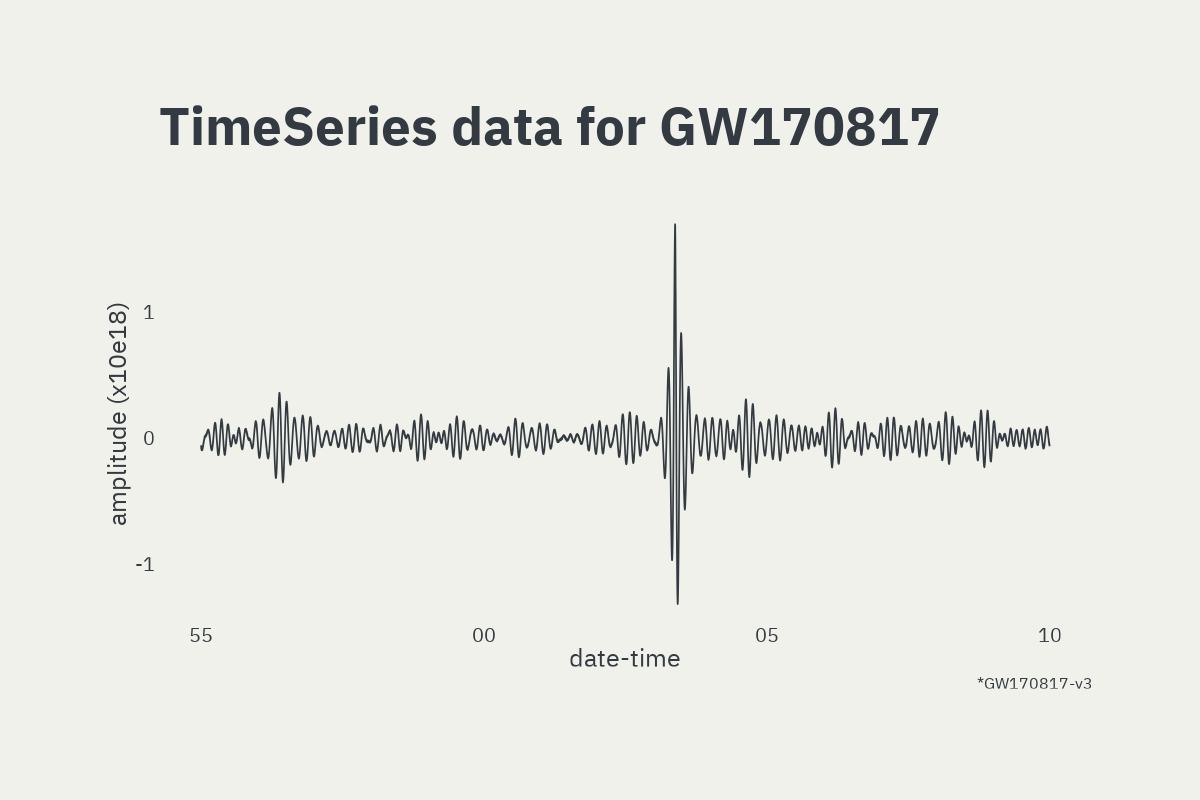

In [ ]:
%%R -w 1200 -h 800

gw_event %>%
filter(capture_dttm > '2017-08-17 12:40:55' & capture_dttm < '2017-08-17 12:41:10' & observatory == "L1") %>%
ggplot(aes(capture_dttm, size*1e18)) +
geom_line(color = "#343A41", size = 0.8) +
labs(x = 'date-time',
     y = 'amplitude (x10e18)',
     title = glue('TimeSeries data for GW170817\n\n'),
     caption = glue("*{unique(gw_event$id)}")) +
theme_light_beige #+
# facet_wrap(~observatory, scales = "free")

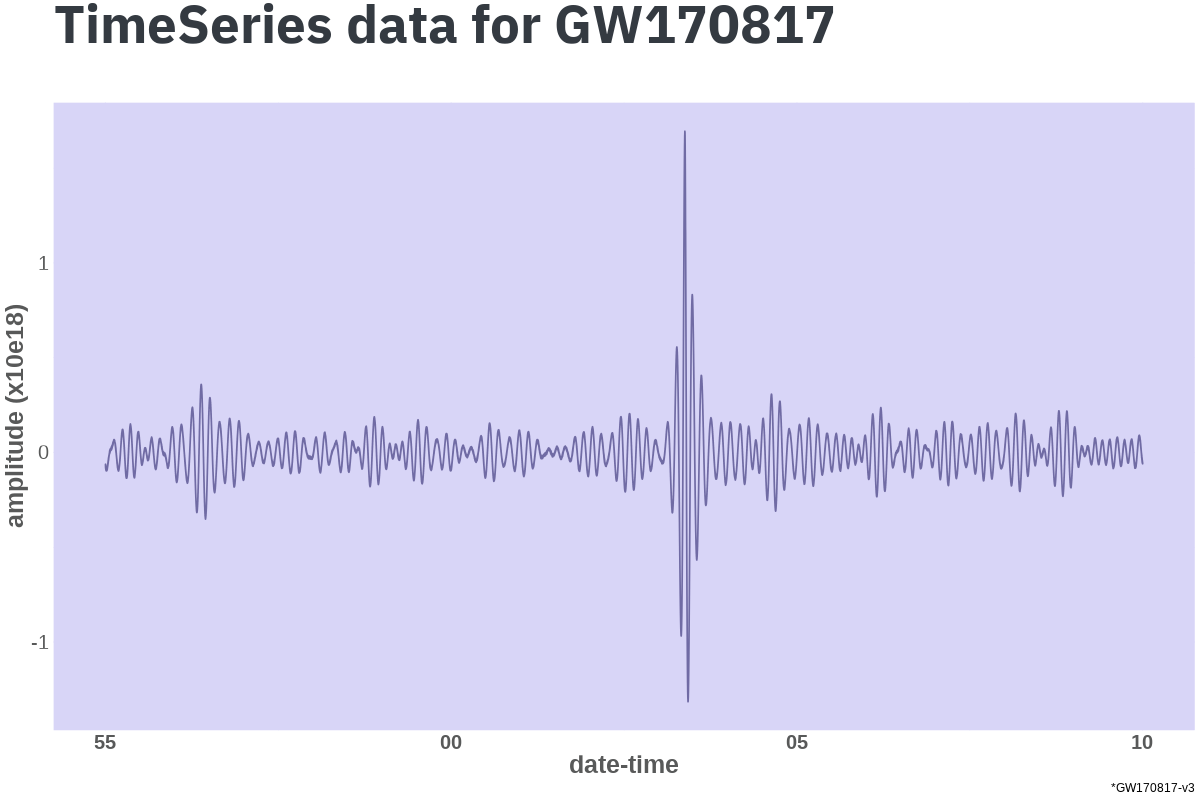

In [ ]:
%%R -w 1200 -h 800

gw_event %>%
filter(capture_dttm > '2017-08-17 12:40:55' & capture_dttm < '2017-08-17 12:41:10' & observatory == "L1") %>%
ggplot(aes(capture_dttm, size*1e18)) +
geom_line(color = purple_dark, size = 0.8) +
labs(x = 'date-time',
     y = 'amplitude (x10e18)',
     title = glue('TimeSeries data for GW170817\n\n'),
     caption = glue("*{unique(gw_event$id)}")) +
theme_tech

In [ ]:
%%R
# Specific merger involving 2 neutron stars
bns_event2 <- bq_table_download(bq_project_query("grav-waves-358320",
"select b.*
from `mergers.features` a
left join `mergers.timeseries` b
on a.id = b.id
where a.commonName = 'GW190425';"))

In [ ]:
%%R

min(bns_event2$capture_dttm)

[1] "2019-04-25 08:17:50 UTC"


In [ ]:
%%R

max(bns_event2$capture_dttm)

[1] "2019-04-25 08:18:20 UTC"


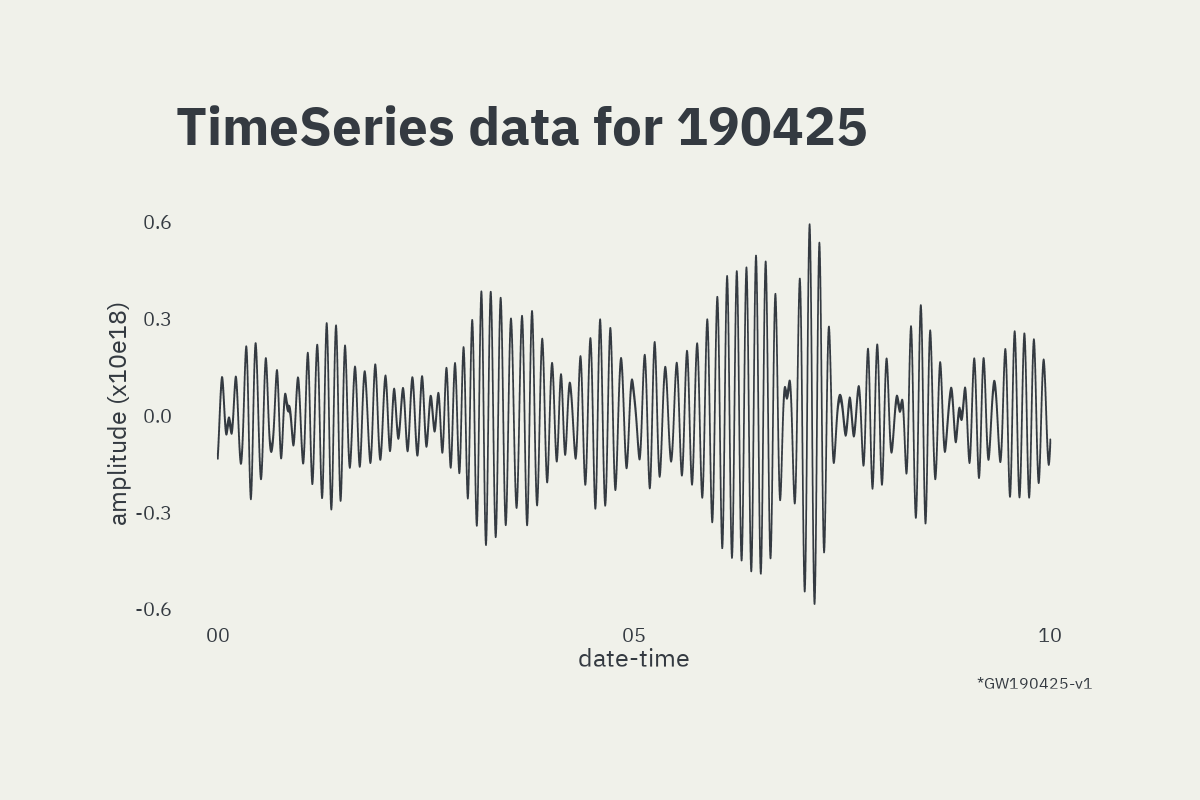

In [ ]:
%%R -w 1200 -h 800

bns_event2 %>%
filter(capture_dttm > '2019-04-25 08:17:60' & capture_dttm < '2019-04-25 08:18:10' & observatory == "L1") %>%
ggplot(aes(capture_dttm, size*1e18)) +
geom_line(color = "#343A41", size = 0.8) +
labs(x = 'date-time',
     y = 'amplitude (x10e18)',
     title = glue('TimeSeries data for 190425\n\n'),
     caption = glue("*{unique(bns_event2$id)}")) +
theme_light_beige #+
# facet_wrap(~observatory, scales = "free")

# 2. Pull a BBH merger

In [ ]:
%%R
min(bbh$capture_dttm)

[1] "2017-08-14 10:30:28 UTC"


In [ ]:
%%R
max(bbh$capture_dttm)

[1] "2017-08-14 10:30:58 UTC"


In [ ]:
%%R
# Specific merger involving 2 neutron stars
bbh <- bq_table_download(bq_project_query("grav-waves-358320",
"select b.*
from `mergers.features` a
left join `mergers.timeseries` b
on a.id = b.id
where a.commonName = 'GW170814';"))

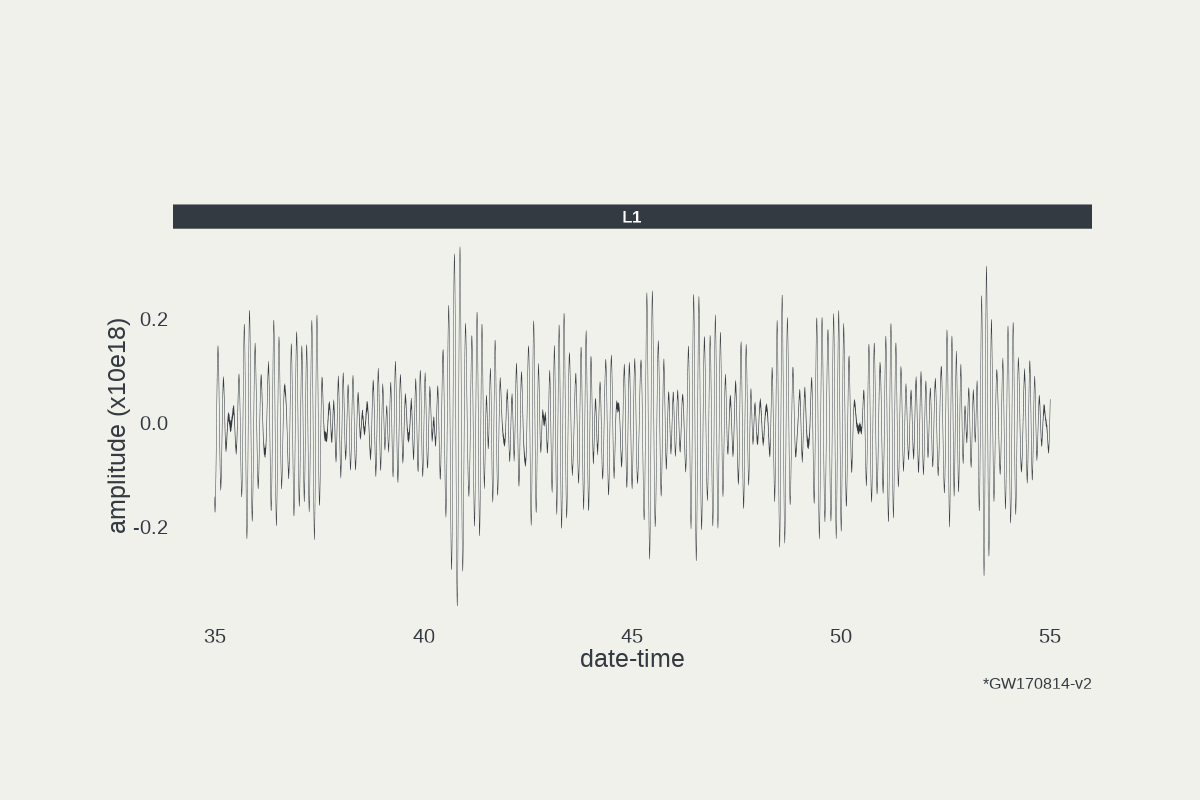

In [ ]:
%%R -w 1200 -h 800

bbh %>%
filter(observatory == "L1" & capture_dttm > '2017-08-14 10:30:35' & capture_dttm < '2017-08-14 10:30:55') %>%
ggplot(aes(capture_dttm, size*1e18)) +
geom_line(color = "#343A41", size = 0.2) +
labs(x = 'date-time',
     y = 'amplitude (x10e18)',
     title = glue('\n\n'),
     caption = glue("*{unique(bbh$id)}")) +
theme_light_beige +
facet_wrap(~observatory, scales = "free")

## 2a. Cleaning the BBH waveform

https://gwpy.github.io/docs/stable/examples/signal/gw150914/#gwpy-example-signal-gw150914

Does this general approach work for other BBHs? (Minus the notches, I'm not sure what the artefacts are.)

In [ ]:
!pip install gwpy

In [8]:
from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data('H1', 1186741861.5-15, 1186741861.5+15)

In [21]:
from gwpy.signal import filter_design
bp = filter_design.bandpass(70, 175, hdata.sample_rate)

In [16]:
notches = [filter_design.notch(line, hdata.sample_rate) for line in (60, 120, 180)]

In [22]:
zpk = filter_design.concatenate_zpks(bp, *notches)

In [23]:
hfilt = hdata.filter(zpk, filtfilt=True)

In [24]:
hdata = hdata.crop(*hdata.span.contract(1))
hfilt = hfilt.crop(*hfilt.span.contract(1))

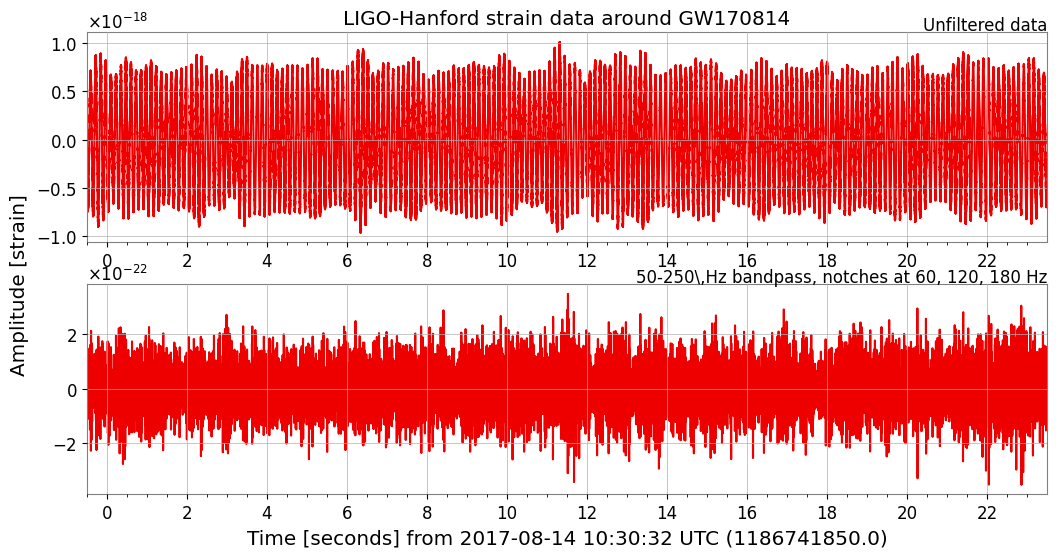

In [25]:
from gwpy.plot import Plot
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True,
            color='gwpy:ligo-hanford')
ax1, ax2 = plot.axes
ax1.set_title('LIGO-Hanford strain data around GW170814')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz',
         transform=ax2.transAxes, ha='right')
plot.show()